#📌 Extracción

In [39]:
import requests
import json
import pandas as pd

In [40]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
datos = response.json()

datos = pd.DataFrame(datos)
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [41]:
col1_2 = datos[['customerID', 'Churn']]
col1_2.head()

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes


In [42]:
n_customer = pd.json_normalize(datos['customer'])
n_phone = pd.json_normalize(datos['phone'])
n_internet = pd.json_normalize(datos['internet'])
n_account = pd.json_normalize(datos['account'])

In [43]:
n_datos = pd.concat([col1_2, n_customer, n_phone, n_internet, n_account], axis=1)
n_datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [44]:
n_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


## **Comprobación de los datos**

In [45]:
#valores nulos
n_datos.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [46]:
#valores duplicados
print(n_datos.duplicated().sum())

0


In [47]:
for col in n_datos.select_dtypes(include='object').columns:
    print(f"{col}: {n_datos[col].unique()}")

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [48]:
n_datos[n_datos['Charges.Total'].str.strip() == " "]


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


In [49]:
# Reemplazar espacios vacíos o strings vacíos con "0"
n_datos['Charges.Total'] = n_datos['Charges.Total'].replace(" ", "0").replace("", "0")

# Ahora convertir a número
n_datos['Charges.Total'] = pd.to_numeric(n_datos['Charges.Total'])

## **Manejo de inconsistencias**

In [50]:
# Convertir columnas numéricas
n_datos['SeniorCitizen'] = pd.to_numeric(n_datos['SeniorCitizen'])
n_datos['tenure'] = pd.to_numeric(n_datos['tenure'])
n_datos['Charges.Monthly'] = pd.to_numeric(n_datos['Charges.Monthly'])
n_datos['Charges.Total'] = pd.to_numeric(n_datos['Charges.Total'])

In [51]:
n_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [52]:
# Convertir a texto
columnas_texto = [
    'customerID', 'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'OnlineSecurity'
]

n_datos[columnas_texto] = n_datos[columnas_texto].astype('string')

In [53]:
n_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   string 
 1   Churn             7267 non-null   string 
 2   gender            7267 non-null   string 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   string 
 5   Dependents        7267 non-null   string 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   string 
 8   MultipleLines     7267 non-null   string 
 9   InternetService   7267 non-null   string 
 10  OnlineSecurity    7267 non-null   string 
 11  OnlineBackup      7267 non-null   string 
 12  DeviceProtection  7267 non-null   string 
 13  TechSupport       7267 non-null   string 
 14  StreamingTV       7267 non-null   string 
 15  StreamingMovies   7267 non-null   string 
 16  Contract          7267 non-null   string 


## **Cuentas diarias**

In [54]:
n_datos["Cuentas_Diarias"] = (n_datos["Charges.Monthly"] / 30).round(2)
n_datos["Cuentas_Diarias"]

,Cuentas_Diarias
0,2.19
1,2.00
2,2.46
3,3.27
4,2.80
...,...
7262,1.84
7263,2.84
7264,1.68
7265,2.26


## **Estandarización**

In [55]:
#renombrar columnas a español
n_datos.rename(columns={
    'customerID': 'ID_Cliente',
    'gender': 'Genero',
    'SeniorCitizen': 'Adulto_Mayor',
    'Partner': 'Tiene_Pareja',
    'Dependents': 'Tiene_Dependientes',
    'tenure': 'Meses_Antiguedad',
    'PhoneService': 'Servicio_Telefonico',
    'MultipleLines': 'Multiples_Lineas',
    'InternetService': 'Tipo_Internet',
    'OnlineSecurity': 'Seguridad_Online',
    'OnlineBackup': 'Respaldo_Online',
    'DeviceProtection': 'Proteccion_Dispositivo',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Peliculas',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Factura_Electronica',
    'PaymentMethod': 'Metodo_Pago',
    'Charges.Monthly': 'Factura_Mensual',
    'Charges.Total': 'Factura_Total',
    'Cuentas_Diarias': 'Factura_Diaria',
    'Churn': 'Cancelacion'
}, inplace=True)

In [56]:
n_datos.head()

,ID_Cliente,Cancelacion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Antiguedad,Servicio_Telefonico,Multiples_Lineas,Tipo_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Factura_Mensual,Factura_Total,Factura_Diaria
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [57]:
for col in n_datos.select_dtypes(include='object').columns:
    print(f"{col}: {n_datos[col].unique()}")

In [58]:
columnas_con_servicios = [
    'Multiples_Lineas', 'Seguridad_Online', 'Respaldo_Online',
    'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas'
]

for col in columnas_con_servicios:
    n_datos[col] = n_datos[col].replace({
        'No internet service': 'No',
        'No phone service': 'No'
    })

In [59]:
n_datos.head()

,ID_Cliente,Cancelacion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Antiguedad,Servicio_Telefonico,Multiples_Lineas,Tipo_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Factura_Mensual,Factura_Total,Factura_Diaria
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [60]:
for col in columnas_con_servicios:
    n_datos[col] = n_datos[col].map({'Yes': 1, 'No': 0})

In [61]:
n_datos.head()

,ID_Cliente,Cancelacion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Antiguedad,Servicio_Telefonico,Multiples_Lineas,Tipo_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Factura_Mensual,Factura_Total,Factura_Diaria
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,0,DSL,...,0,1,1,0,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,1,DSL,...,0,0,0,1,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,0,Fiber optic,...,1,0,0,0,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,0,Fiber optic,...,1,0,1,1,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,0,Fiber optic,...,0,1,1,0,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [62]:
n_datos['Cancelacion'] = n_datos['Cancelacion'].replace('', pd.NA)

In [63]:
n_datos.head()

,ID_Cliente,Cancelacion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Antiguedad,Servicio_Telefonico,Multiples_Lineas,Tipo_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Factura_Mensual,Factura_Total,Factura_Diaria
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,0,DSL,...,0,1,1,0,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,1,DSL,...,0,0,0,1,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,0,Fiber optic,...,1,0,0,0,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,0,Fiber optic,...,1,0,1,1,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,0,Fiber optic,...,0,1,1,0,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [64]:
columnas_binarias_adicionales = [
    'Tiene_Pareja', 'Tiene_Dependientes', 'Servicio_Telefonico',
    'Factura_Electronica', 'Cancelacion'
]

# Convertir a binario también
for col in columnas_binarias_adicionales:
    n_datos[col] = n_datos[col].map({'Yes': 1, 'No': 0})

In [65]:
n_datos.head()

,ID_Cliente,Cancelacion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Antiguedad,Servicio_Telefonico,Multiples_Lineas,Tipo_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Factura_Mensual,Factura_Total,Factura_Diaria
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

#📊 Carga y análisis

##**Analisis descriptivo**

In [66]:
# Solo columnas numéricas
numericas = n_datos.select_dtypes(include='number')

# Estadísticas básicas
print("Media:\n", numericas.mean())
print("\nMínimos:\n", numericas.min())
print("\nMáximos:\n", numericas.max())

Media:
 Cancelacion                  0.265370
Adulto_Mayor                 0.162653
Tiene_Pareja                 0.484106
Tiene_Dependientes           0.300124
Meses_Antiguedad            32.346498
Servicio_Telefonico          0.902711
Multiples_Lineas             0.421770
Seguridad_Online             0.285950
Respaldo_Online              0.344571
Proteccion_Dispositivo       0.342782
Soporte_Tecnico              0.289528
Streaming_TV                 0.383927
Streaming_Peliculas          0.387505
Factura_Electronica          0.593230
Factura_Mensual             64.720098
Factura_Total             2277.182035
Factura_Diaria               2.157292
dtype: float64

Mínimos:
 Cancelacion                0.00
Adulto_Mayor               0.00
Tiene_Pareja               0.00
Tiene_Dependientes         0.00
Meses_Antiguedad           0.00
Servicio_Telefonico        0.00
Multiples_Lineas           0.00
Seguridad_Online           0.00
Respaldo_Online            0.00
Proteccion_Dispositivo     0.00


In [67]:
#porcentaje de cancelacion
tasa_cancelacion = n_datos['Cancelacion'].mean() * 100
print(f"Tasa de cancelación: {tasa_cancelacion:.2f}%")

Tasa de cancelación: 26.54%


In [68]:
#valor mensula en factura mensual
promedio_mensual = n_datos['Factura_Mensual'].mean()
print(f"Promedio factura mensual: ${promedio_mensual:.2f}")

Promedio factura mensual: $64.72


In [69]:
#valorpromedio diario
promedio_diario = n_datos['Factura_Diaria'].mean()
print(f"Promedio factura diaria: ${promedio_diario:.2f}")

Promedio factura diaria: $2.16


In [70]:
#antiguadad promedio
antiguedad_promedio = n_datos['Meses_Antiguedad'].mean()
print(f"Antigüedad promedio: {antiguedad_promedio:.1f} meses")

Antigüedad promedio: 32.3 meses


##**Distribucion de evasion**

In [71]:
import matplotlib.pyplot as plt

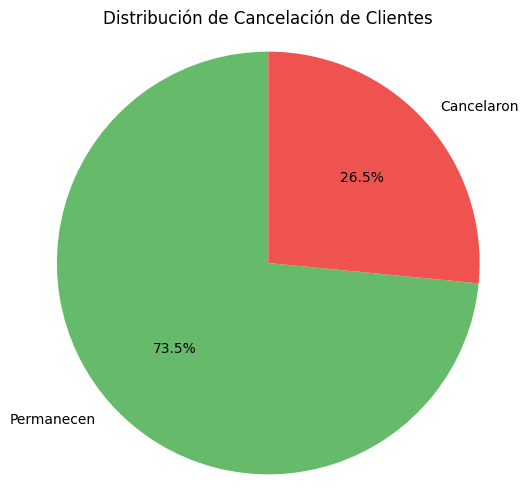

In [72]:
churn_counts = n_datos['Cancelacion'].value_counts()
texto = ['Permanecen', 'Cancelaron']
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=texto, autopct='%1.1f%%', colors=['#66bb6a', '#ef5350'], startangle=90)
plt.title('Distribución de Cancelación de Clientes')
plt.axis('equal')
plt.show()

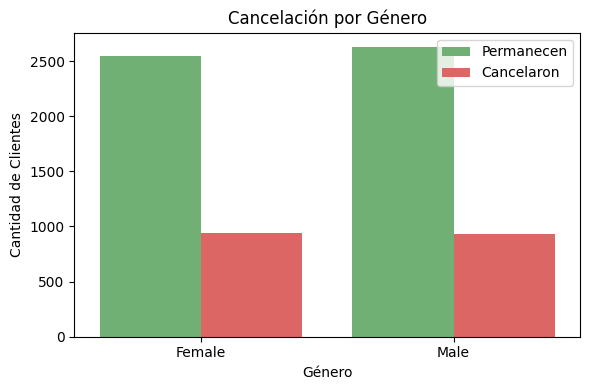

In [73]:
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(data=n_datos, x='Genero', hue='Cancelacion', palette=['#66bb6a', '#ef5350'])
plt.title('Cancelación por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Clientes')
plt.legend(['Permanecen', 'Cancelaron'])
plt.tight_layout()
plt.show()

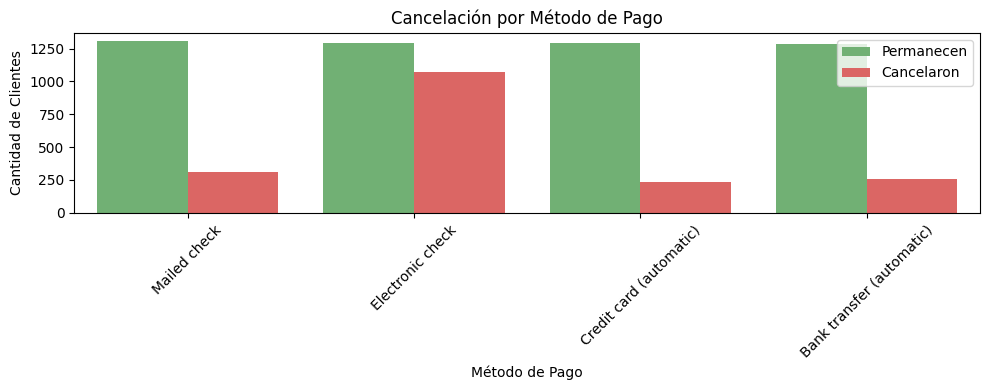

In [74]:
plt.figure(figsize=(10, 4))
sns.countplot(data=n_datos, x='Metodo_Pago', hue='Cancelacion', palette=['#66bb6a', '#ef5350'])
plt.title('Cancelación por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)
plt.legend(['Permanecen', 'Cancelaron'])
plt.tight_layout()
plt.show()


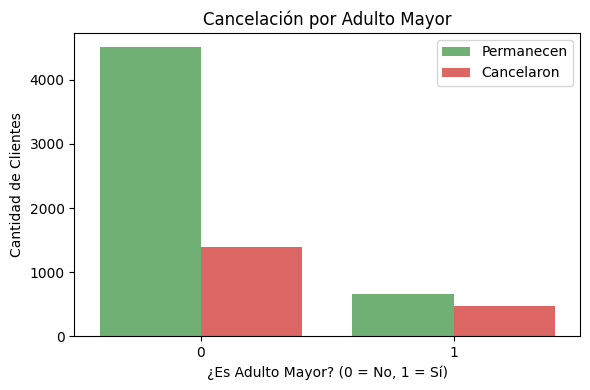

In [75]:
plt.figure(figsize=(6, 4))
sns.countplot(data=n_datos, x='Adulto_Mayor', hue='Cancelacion', palette=['#66bb6a', '#ef5350'])
plt.title('Cancelación por Adulto Mayor')
plt.xlabel('¿Es Adulto Mayor? (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de Clientes')
plt.legend(['Permanecen', 'Cancelaron'])
plt.tight_layout()
plt.show()


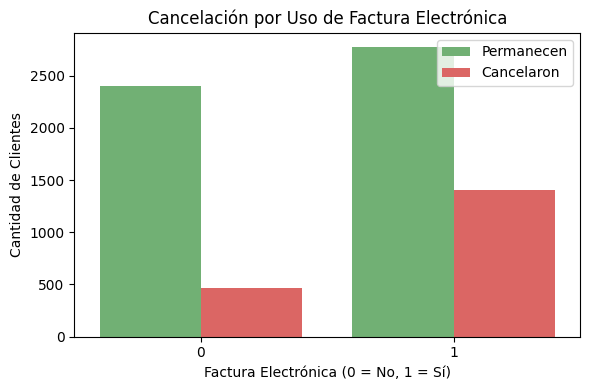

In [76]:
plt.figure(figsize=(6, 4))
sns.countplot(data=n_datos, x='Factura_Electronica', hue='Cancelacion', palette=['#66bb6a', '#ef5350'])
plt.title('Cancelación por Uso de Factura Electrónica')
plt.xlabel('Factura Electrónica (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de Clientes')
plt.legend(['Permanecen', 'Cancelaron'])
plt.tight_layout()
plt.show()


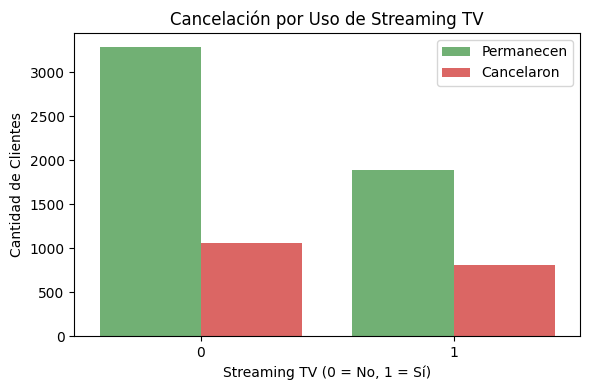

In [77]:
plt.figure(figsize=(6, 4))
sns.countplot(data=n_datos, x='Streaming_TV', hue='Cancelacion', palette=['#66bb6a', '#ef5350'])
plt.title('Cancelación por Uso de Streaming TV')
plt.xlabel('Streaming TV (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de Clientes')
plt.legend(['Permanecen', 'Cancelaron'])
plt.tight_layout()
plt.show()


In [78]:
print(n_datos['Cancelacion'].unique())

[ 0.  1. nan]


In [79]:
n_datos_filtrado = n_datos[n_datos['Cancelacion'].notna()]


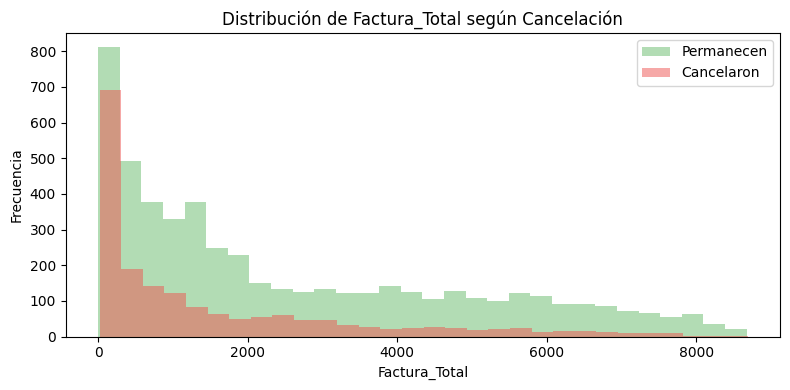

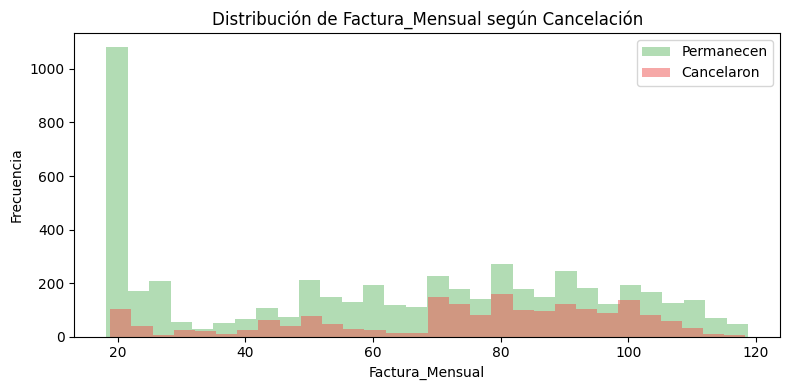

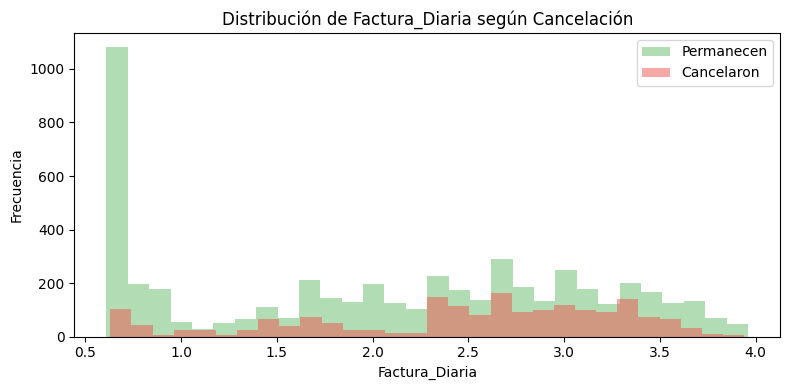

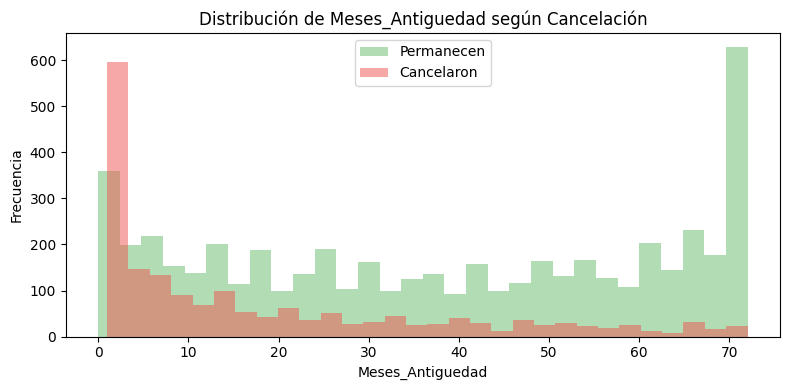

In [80]:
import matplotlib.pyplot as plt

variables_numericas = ['Factura_Total', 'Factura_Mensual', 'Factura_Diaria', 'Meses_Antiguedad']
colores = {0.0: '#66bb6a', 1.0: '#ef5350'}  # 0 = Permanece, 1 = Canceló

for var in variables_numericas:
    plt.figure(figsize=(8, 4))
    for valor in [0.0, 1.0]:
        subset = n_datos_filtrado[n_datos_filtrado['Cancelacion'] == valor]
        if not subset.empty:
            plt.hist(subset[var], bins=30, alpha=0.5, label=f'{"Cancelaron" if valor == 1.0 else "Permanecen"}', color=colores[valor])

    plt.title(f'Distribución de {var} según Cancelación')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.tight_layout()
    plt.show()